# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

import all libraries

In [3]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import os
import re

%matplotlib inline

In [4]:
df1 = pd.read_csv("twitter-archive-enhanced.csv")

Made a copy of the original dataframe

In [5]:
df1c = df1.copy()

Viewing the dataframe

In [6]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

Import the library 

In [7]:
img_df = pd.read_csv("image-predictions.tsv", sep = '\t')

In [8]:
df2 = img_df.copy()

In [9]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
import json

In [11]:
list_col = []
with open("tweet-json.txt", "r") as fr:
    lines = fr.readlines()
    for line in lines:
        data = json.loads(line)
        dict_1 = {"tweet_id": data["id"],"Favourite_count": data["favorite_count"],"retweet_count" : data["retweet_count"]}
        list_col.append(dict_1)

twt_df = pd.DataFrame(list_col)

In [12]:
df3 = twt_df.copy()

In [13]:
df3.head()

,Favourite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. 
**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# Assesing the first dataframe

Checking for missing cells

In [14]:
df1.isna().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [15]:
df1.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

Checking for duplicated cells

In [16]:
df1.duplicated().any()

False

Checking data types of the cells 

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
df1["timestamp"][0]

'2017-08-01 16:23:56 +0000'

Checking for original tweets

In [19]:
rt_df= df1[df1['text'].str.contains('RT')]

In [20]:
rt_df.any()

tweet_id                       True
in_reply_to_status_id         False
in_reply_to_user_id           False
timestamp                      True
source                         True
text                           True
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator               True
rating_denominator             True
name                           True
doggo                          True
floofer                        True
pupper                         True
puppo                          True
dtype: bool

Checking for the highest rating

In [21]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Checking for invalid cells 

In [22]:
inval_cells = df1.applymap(lambda x: x == "a")

In [23]:
inval_cells.any()

tweet_id                      False
in_reply_to_status_id         False
in_reply_to_user_id           False
timestamp                     False
source                        False
text                          False
retweeted_status_id           False
retweeted_status_user_id      False
retweeted_status_timestamp    False
expanded_urls                 False
rating_numerator              False
rating_denominator            False
name                           True
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

The dog stages appear in 4 different columns

In [24]:
df1["text"][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [25]:
None_cells = df1.applymap(lambda x: x == "None")

In [26]:
None_cells.any()

tweet_id                      False
in_reply_to_status_id         False
in_reply_to_user_id           False
timestamp                     False
source                        False
text                          False
retweeted_status_id           False
retweeted_status_user_id      False
retweeted_status_timestamp    False
expanded_urls                 False
rating_numerator              False
rating_denominator            False
name                           True
doggo                          True
floofer                        True
pupper                         True
puppo                          True
dtype: bool

### Quality issues
1. There are cells without input that will need to be dropped

2. There are cells with wrong datatype representation like timestamp column

3. From inspection it is noticed some cells have retweets so only the original cells are needed

4. It is observed that the ratings numerator is above 10 which chould not be the case

5. The name column has an invalid name like "a" and other lowercase names

6. Some columns are not needed for the analysis

7. The rating were not properly extracted from the cells

8. Some cells have none values

### Tidiness issues
1. Dog stages were merged into one column and all missing cells were removed

2. The dataframes are 3 in number and should be merged into 1 master dataframe that can be operated on

# Assesing the Second dataframe

Checking for missing cells

In [27]:
img_df.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

Checking for duplicated cells

In [28]:
df2["jpg_url"].duplicated().any()

True

In [29]:
df2[df2["jpg_url"].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [30]:
df2["jpg_url"].duplicated().any()

True

# Assesing the Third dataframe

In [31]:
img_df = pd.read_csv("image-predictions.tsv", sep = '\t')

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [32]:
# Make copies of original pieces of data
df1c = df1.copy()

### Issue #1: There are cells without any input in them 

#### Define: There are cells without any input in them causing them to have gaps in the dataframe

#### Code

To find the cells without any input

In [33]:
df1.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

Grouping the cells without any input into a list

In [34]:
drop_col = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp']

In [35]:
df1.drop(drop_col, axis=1, inplace= True)

#### Test

In [36]:
df1.isna().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         59
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

### Issue #2: Wrong format for the timestamp cell

#### Define: The time stamp cell has a wrong format and is long without following any format

#### Code

To check the format already in the dataframe

In [37]:
df1["timestamp"][0]

'2017-08-01 16:23:56 +0000'

To change the dataformat type 

In [38]:
df1["timestamp"] = pd.to_datetime(df1["timestamp"])

To change the dataformat to the particular name of the week it falls on

In [39]:
df1["timestamp"] = df1["timestamp"].dt.day_name()

#### Test

In [40]:
df1["timestamp"][0]

'Tuesday'

### Issue #3: The retweets are also showing up populating the dataframe

#### Define: There are some cells that contain retweets and not origial tweets and for quality of dataset to be intact it is best to have the originals and not repetitions 

#### Code

In [41]:
rt_df= df1[df1['text'].str.contains('RT')]

To check the cells with retweets in them

In [42]:
rt_df.any()

tweet_id              True
timestamp             True
source                True
text                  True
expanded_urls         True
rating_numerator      True
rating_denominator    True
name                  True
doggo                 True
floofer               True
pupper                True
puppo                 True
dtype: bool

To drop the cels with retweets in them 

In [43]:
df1.drop(rt_df.index, inplace= True)

#### Test

In [44]:
ori_df= df1[df1['text'].str.contains('RT')]

In [45]:
ori_df.any()

tweet_id              False
timestamp             False
source                False
text                  False
expanded_urls         False
rating_numerator      False
rating_denominator    False
name                  False
doggo                 False
floofer               False
pupper                False
puppo                 False
dtype: bool

### Issue #4: Ratings over 10 for the numerator 

#### Define: The ratings are supposed to be over 10 but some are above 10 and this should not be the case

#### Code

To check for the ones with rating above 10

In [46]:
df1.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.164000e+03,2164.000000,2164.000000
mean,7.371741e+17,13.226433,10.495379
std,6.753662e+16,47.846578,7.036821
min,6.660209e+17,0.000000,0.000000
25%,6.768214e+17,10.000000,10.000000
50%,7.097095e+17,11.000000,10.000000
75%,7.896066e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


To change the cells to be below 10

In [47]:
def func(dfn):
    if dfn['rating_numerator'] > 10:
        return 10
    else:
        return dfn['rating_numerator']

In [48]:
df1["rating_numerator"] = df1.apply(lambda x : func(x), axis = 1)

In [49]:
df1["rating_numerator"].describe()

count    2164.000000
mean        9.435767
std         1.477849
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: rating_numerator, dtype: float64

In [50]:
def func(dfd):
    if dfd['rating_denominator'] > 10:
        return 10
    else:
        return dfd['rating_denominator']

In [51]:
df1["rating_denominator"] = df1.apply(lambda x : func(x), axis = 1)

In [52]:
df1["rating_denominator"].describe()

count    2164.000000
mean        9.990296
std         0.282643
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: rating_denominator, dtype: float64

#### Test

In [53]:
df1["rating_numerator"].max()

10

In [54]:
df1["rating_denominator"].max()

10

In [55]:
df1.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.164000e+03,2164.000000,2164.000000
mean,7.371741e+17,9.435767,9.990296
std,6.753662e+16,1.477849,0.282643
min,6.660209e+17,0.000000,0.000000
25%,6.768214e+17,10.000000,10.000000
50%,7.097095e+17,10.000000,10.000000
75%,7.896066e+17,10.000000,10.000000
max,8.924206e+17,10.000000,10.000000


### Issue #5: The name cell has a few invalid entries

#### Define: The name cell has some invalid entries in it with just "a" as the input for it that need to be changed 

#### Code

To check across all columns in a data frame to find invalid names

In [56]:
inval_cells = df1.applymap(lambda x: x == "a")

In [57]:
inval_cells.any()

tweet_id              False
timestamp             False
source                False
text                  False
expanded_urls         False
rating_numerator      False
rating_denominator    False
name                   True
doggo                 False
floofer               False
pupper                False
puppo                 False
dtype: bool

To replace those cells with empty cells ""

In [58]:
df1["name"].replace({"a":""}, inplace= True)

#### Test

In [59]:
val_cells= df1.applymap(lambda x: x == "a")

In [60]:
val_cells.any()

tweet_id              False
timestamp             False
source                False
text                  False
expanded_urls         False
rating_numerator      False
rating_denominator    False
name                  False
doggo                 False
floofer               False
pupper                False
puppo                 False
dtype: bool

### Issue #5: None cells in the data set

#### Define: Some cells have none in them as their input and this will impede on the quality of the dataset

#### Code

To check for the cells with None in them.

In [61]:
None_cells = df1.applymap(lambda x: x == "None")

In [62]:
None_cells.any()

tweet_id              False
timestamp             False
source                False
text                  False
expanded_urls         False
rating_numerator      False
rating_denominator    False
name                   True
doggo                  True
floofer                True
pupper                 True
puppo                  True
dtype: bool

Putining this none type cells in a list

In [63]:
None_list= list(df1)[7:]

In [64]:
None_list

['name', 'doggo', 'floofer', 'pupper', 'puppo']

Replacing these cells with an empty input 

In [65]:
for col in None_list:
    df1[col].replace({"None":""}, inplace= True)

#### Test

In [66]:
df1[None_list]

,name,doggo,floofer,pupper,puppo
0,Phineas,,,,
1,Tilly,,,,
2,Archie,,,,
3,Darla,,,,
4,Franklin,,,,
5,,,,,
6,Jax,,,,
7,,,,,
8,Zoey,,,,
9,Cassie,doggo,,,


### Issue #6: The dog stages are seperated

#### Define: The dog stages are put in different columns and can be merged into one column for tidyness

#### Code

Grouping the cells in one column

In [67]:
df1["dog_stages"]= df1["doggo"]+ ","+ df1["floofer"]+ ","+ df1["pupper"]+ ","+ df1["puppo"]

Checking the value counts for the different stages

In [68]:
df1["dog_stages"].value_counts()

,,,                1822
,,pupper,           223
doggo,,,             74
,,,puppo             24
doggo,,pupper,       10
,floofer,,            9
doggo,floofer,,       1
doggo,,,puppo         1
Name: dog_stages, dtype: int64

Cleaning this input so the stages appea without the commas

In [69]:
def clean_func(y):
    if y == ",,pupper,":
        return "pupper"
    elif y == "doggo,,,":
        return "doggo"
    elif y == ",,,puppo":
        return "puppo"
    elif y == "doggo,,pupper,":
        return "doggo,pupper"
    elif y == ",floofer,,":
        return "floofer"
    elif y == "doggo,floofer,,":
        return "doggo,floofer"
    elif y == "doggo,,,puppo":
        return "doggo,puppo"
    elif y == ",,,":
        return ""

In [70]:
df1["dog_stages"]= df1["dog_stages"].apply(clean_func)

checking the datasets for the cleaning done

In [71]:
df1["dog_stages"].value_counts()

                 1822
pupper            223
doggo              74
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stages, dtype: int64

Checking to see if this has been implemented on the master dataset

In [72]:
df1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
0,892420643555336193,Tuesday,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,,,,,
1,892177421306343426,Tuesday,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,,,,,
2,891815181378084864,Monday,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,,,,,
3,891689557279858688,Sunday,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,,,,,
4,891327558926688256,Saturday,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,,,,,


Dropping the dog stages not needed with empty cells 

In [73]:
df1.drop(df1[df1["dog_stages"] == ""].index,inplace = True)

In [74]:
df1["dog_stages"].value_counts()

pupper           223
doggo             74
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stages, dtype: int64

To check if the dog stages have been removed 

In [75]:
df1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
9,890240255349198849,Wednesday,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,10,10,Cassie,doggo,,,,doggo
12,889665388333682689,Tuesday,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,10,10,,,,,puppo,puppo
14,889531135344209921,Monday,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,10,10,Stuart,,,,puppo,puppo
29,886366144734445568,Saturday,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,10,10,Roscoe,,,pupper,,pupper
43,884162670584377345,Sunday,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,10,10,Yogi,doggo,,,,doggo


Dropping the erstwhile useless dog stages in the other columns we first group in a list

In [76]:
dog_drop= list(df1)[8:-1]

In [77]:
dog_drop

['doggo', 'floofer', 'pupper', 'puppo']

Dropping the dog stages 

In [78]:
df1.drop(dog_drop, axis=1, inplace= True)

#### Test

In [79]:
df1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
9,890240255349198849,Wednesday,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,10,10,Cassie,doggo
12,889665388333682689,Tuesday,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,10,10,,puppo
14,889531135344209921,Monday,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,10,10,Stuart,puppo
29,886366144734445568,Saturday,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,10,10,Roscoe,pupper
43,884162670584377345,Sunday,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,10,10,Yogi,doggo


### Issue #7: Different cases in the name column

#### Define: The names are in different cases causing issues with the quality of data

#### Code

In [80]:
df1.name.str.islower().any()

True

Putting all the names in upper case 

In [81]:
unacceptable_name_list = list(df1[df1["name"].str.islower()]["name"].unique())

Checking the list of unacceptable names 

In [82]:
unacceptable_name_list

['one', 'his', 'actually', 'just', 'mad', 'all', 'the']

In [83]:
for x in unacceptable_name_list:
    df1['name'].replace(x, "",inplace = True)

In [84]:
df1["name"]

9          Cassie
12               
14         Stuart
29         Roscoe
43           Yogi
46      Grizzwald
49            Gus
56               
71         Snoopy
82         Ginger
92            Jed
94      Sebastian
98         Sierra
99               
107         Rover
108      Napolean
110              
121         Scout
129        Shikha
135        Jamesy
168              
172              
191              
199              
200              
220        Boomer
240        Barney
248        Mimosa
249       Pickles
293              
          ...    
1867             
1875         Zuzu
1880       Mollie
1889     Superpup
1897        Rufio
1903             
1907             
1915       Lennon
1921          Gus
1930        Kaiya
1936             
1937         Obie
1945      Raymond
1948      Pickles
1954       Albert
1956       Jeffri
1960             
1967       Django
1970          Eve
1974     Fletcher
1977      Schnozz
1980     Chuckles
1981         Chet
1985       Cheryl
1992      

#### Test

In [85]:
list(df1[df1["name"].str.islower()]["name"].unique())

[]

### Issue #8: Improper ratings extraction

#### Define: The ratings were not properly extracted 

#### Code

In [86]:
df1["text"][9]

'This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A'

Extracting the ratings properly

In [87]:
df1["text"].str.contains(r"(\d+\.?\d*/\d+)")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


9       True
12      True
14      True
29      True
43      True
46      True
49      True
56      True
71      True
82      True
92      True
94      True
98      True
99      True
107     True
108     True
110     True
121     True
129     True
135     True
168     True
172     True
191     True
199     True
200     True
220     True
240     True
248     True
249     True
293     True
        ... 
1867    True
1875    True
1880    True
1889    True
1897    True
1903    True
1907    True
1915    True
1921    True
1930    True
1936    True
1937    True
1945    True
1948    True
1954    True
1956    True
1960    True
1967    True
1970    True
1974    True
1977    True
1980    True
1981    True
1985    True
1992    True
1995    True
2002    True
2009    True
2015    True
2017    True
Name: text, Length: 342, dtype: bool

In [88]:
df1["text"].str.extract(r"(\d+\.?\d*/\d+)")

,0
9,14/10
12,13/10
14,13/10
29,12/10
43,12/10
46,13/10
49,12/10
56,14/10
71,13/10
82,12/10


In [89]:
df1["rating"]= df1["text"].str.extract(r"(\d+\.?\d*/\d+)")

In [90]:
df1r = df1r1 = df1.copy()
df1r

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,rating
9,890240255349198849,Wednesday,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,10,10,Cassie,doggo,14/10
12,889665388333682689,Tuesday,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,10,10,,puppo,13/10
14,889531135344209921,Monday,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,10,10,Stuart,puppo,13/10
29,886366144734445568,Saturday,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,10,10,Roscoe,pupper,12/10
43,884162670584377345,Sunday,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,10,10,Yogi,doggo,12/10
46,883360690899218434,Friday,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,10,10,Grizzwald,floofer,13/10
49,882762694511734784,Thursday,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,10,10,Gus,pupper,12/10
56,881536004380872706,Sunday,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,10,10,,pupper,14/10
71,878776093423087618,Sunday,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,10,10,Snoopy,puppo,13/10
82,876838120628539392,Monday,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,https://twitter.com/dog_rates/status/876838120...,10,10,Ginger,pupper,12/10


Spliting the rating according to the numerator and denominator

In [91]:
df1["rating"][9].split("/")[0]

'14'

In [92]:
df1r["rating"][9].split("/")[1]

'10'

In [93]:
df1r1["numerator"] = df1r1["rating"].apply(lambda x : x.split("/")[0])

In [94]:
df1r["denominator"] = df1r["rating"].apply(lambda x : x.split("/")[1])

In [95]:
df1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,rating
9,890240255349198849,Wednesday,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,10,10,Cassie,doggo,14/10
12,889665388333682689,Tuesday,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,10,10,,puppo,13/10
14,889531135344209921,Monday,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,10,10,Stuart,puppo,13/10
29,886366144734445568,Saturday,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,10,10,Roscoe,pupper,12/10
43,884162670584377345,Sunday,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,10,10,Yogi,doggo,12/10


Changing the ratings to decimal

Converting from string to integer

In [96]:
df1["numerator"]= df1r["numerator"]
df1["denominator"] = df1r1["denominator"]

In [97]:
df1["denominator"] = df1["denominator"].astype(int)
df1["numerator"] = df1["numerator"].astype(float)

In [98]:
df1["rating"] = df1["numerator"]/df1["denominator"]

In [99]:
df1["rating"]

9       1.4
12      1.3
14      1.3
29      1.2
43      1.2
46      1.3
49      1.2
56      1.4
71      1.3
82      1.2
92      1.3
94      1.3
98      1.2
99      1.2
107     1.2
108     1.2
110     1.4
121     1.2
129     1.2
135     1.3
168     1.3
172     1.3
191     1.3
199     1.4
200     1.1
220     1.2
240     1.3
248     1.3
249     1.2
293     1.2
       ... 
1867    1.2
1875    1.0
1880    1.0
1889    1.1
1897    1.0
1903    1.2
1907    1.0
1915    0.8
1921    0.9
1930    1.2
1936    1.0
1937    1.1
1945    1.0
1948    0.8
1954    1.0
1956    0.7
1960    1.1
1967    1.0
1970    0.8
1974    0.8
1977    1.0
1980    1.0
1981    0.7
1985    1.1
1992    0.6
1995    0.9
2002    1.2
2009    1.1
2015    0.9
2017    0.8
Name: rating, Length: 342, dtype: float64

#### Test

In [100]:
df1.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,rating,numerator,denominator
460,817777686764523521,Saturday,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,10,10,Dido,"doggo,pupper",1.3,13.0,10
956,751583847268179968,Saturday,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,,"doggo,pupper",0.5,5.0,10
701,786051337297522688,Wednesday,"<a href=""http://twitter.com/download/iphone"" r...",13/10 for breakdancing puppo @shibbnbot,NaN,10,10,,puppo,1.3,13.0,10
1360,703268521220972544,Friday,"<a href=""http://twitter.com/download/iphone"" r...",Happy Friday here's a sleepy pupper 12/10 http...,https://twitter.com/dog_rates/status/703268521...,10,10,,pupper,1.2,12.0,10
807,771908950375665664,Saturday,"<a href=""http://twitter.com/download/iphone"" r...",Doggo will persevere. 13/10\nhttps://t.co/yOVz...,https://twitter.com/yahoonews/status/771905568...,10,10,,doggo,1.3,13.0,10


### Issue #9: Duplicated Image Url's in the second dataframe

#### Define: There are duplicated image url's in the second dataframe that may constitute a tidyness issue and need to be removed

#### Code

Collecting the unique Image urls

In [101]:
df2["jpg_url"].duplicated().any()

True

remove duplicated jpg_url columns

In [102]:
df2[df2["jpg_url"].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [103]:
unique_JPG = list(df2["jpg_url"].unique())

#### Test

In [104]:
unique_JPG[0]

'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg'

### Issue #9: The dataframes need to be merged

#### Define: The datasets need to be merged into 1 master dataframe

#### Code

Merging the dataframes using tweet id as the joiner

In [105]:
master_df = df1.merge(twt_df , on = "tweet_id").merge(img_df, on = "tweet_id")

In [106]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,rating,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,Wednesday,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,10,10,Cassie,doggo,1.4,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,889665388333682689,Tuesday,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,10,10,,puppo,1.3,...,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2,889531135344209921,Monday,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,10,10,Stuart,puppo,1.3,...,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
3,886366144734445568,Saturday,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,10,10,Roscoe,pupper,1.2,...,1,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True
4,884162670584377345,Sunday,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,10,10,Yogi,doggo,1.2,...,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True


In [107]:
df1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,rating,numerator,denominator
9,890240255349198849,Wednesday,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,10,10,Cassie,doggo,1.4,14.0,10
12,889665388333682689,Tuesday,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,10,10,,puppo,1.3,13.0,10
14,889531135344209921,Monday,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,10,10,Stuart,puppo,1.3,13.0,10
29,886366144734445568,Saturday,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,10,10,Roscoe,pupper,1.2,12.0,10
43,884162670584377345,Sunday,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,10,10,Yogi,doggo,1.2,12.0,10


In [108]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [109]:
df3.head()

,Favourite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


#### Test

In [110]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,rating,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,Wednesday,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,10,10,Cassie,doggo,1.4,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,889665388333682689,Tuesday,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,10,10,,puppo,1.3,...,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2,889531135344209921,Monday,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,10,10,Stuart,puppo,1.3,...,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
3,886366144734445568,Saturday,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,10,10,Roscoe,pupper,1.2,...,1,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True
4,884162670584377345,Sunday,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,10,10,Yogi,doggo,1.2,...,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [111]:
master_df.to_csv(r'twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

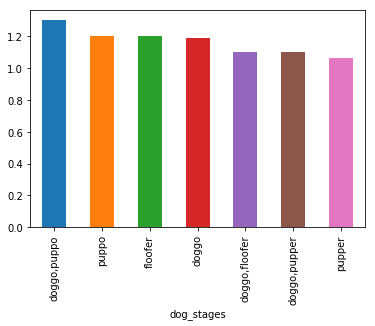

In [112]:
master_df.groupby("dog_stages")["rating"].mean().sort_values(ascending = False).plot(kind = "bar");

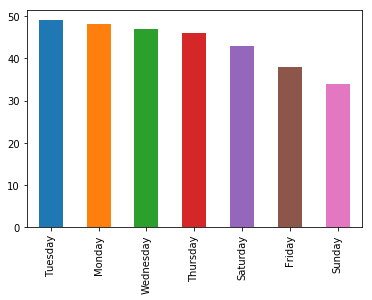

In [113]:
master_df.timestamp.value_counts().plot(kind = "bar");

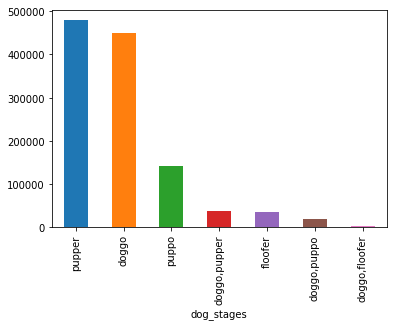

In [114]:
master_df.groupby("dog_stages")["retweet_count"].sum().sort_values(ascending = False).plot(kind = "bar") # retweet_count per dog_stages

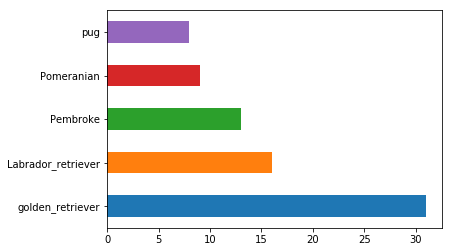

In [115]:
master_df["p1"].value_counts()[:5].plot(kind = "barh") # top 5 dog breeds

# whats the coreelation between p1_conf and favourite

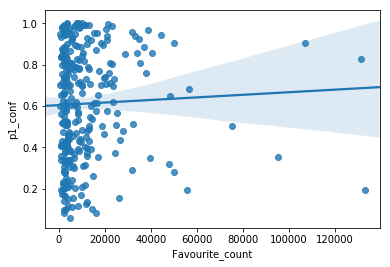

In [116]:
sb.regplot(data = master_df, x = "Favourite_count", y = "p1_conf")

In [117]:
master_df.corr()["p1_conf"].sort_values(ascending = False)# there is a weak correlation 

p1_conf               1.000000
img_num               0.226655
p1_dog                0.208371
p2_dog                0.198240
p3_dog                0.192960
rating                0.159649
numerator             0.159649
rating_numerator      0.131819
tweet_id              0.101732
Favourite_count       0.038512
retweet_count         0.016550
p2_conf              -0.483194
p3_conf              -0.698241
rating_denominator         NaN
denominator                NaN
Name: p1_conf, dtype: float64

In [118]:
master_df["p1_conf"].corr(master_df["Favourite_count"])

0.038512354539295239

In [119]:
master_df.groupby("name")["retweet_count"].sum().sort_values(ascending = False).head()# Name that has the highest retweet_count 

name
          624794
Bo         46809
Jamesy     32883
Sunny      21794
Gabe       17209
Name: retweet_count, dtype: int64

In [120]:
master_df.drop(master_df[master_df["name"] == ""].index,inplace = True)

In [121]:
master_df.groupby("name")["retweet_count"].sum().sort_values(ascending = False).head()# Name that has the highest retweet_count 

name
Bo        46809
Jamesy    32883
Sunny     21794
Gabe      17209
Barney    13076
Name: retweet_count, dtype: int64

In [122]:
master_df.isna().any()

tweet_id              False
timestamp             False
source                False
text                  False
expanded_urls         False
rating_numerator      False
rating_denominator    False
name                  False
dog_stages            False
rating                False
numerator             False
denominator           False
Favourite_count       False
retweet_count         False
jpg_url               False
img_num               False
p1                    False
p1_conf               False
p1_dog                False
p2                    False
p2_conf               False
p2_dog                False
p3                    False
p3_conf               False
p3_dog                False
dtype: bool

In [123]:
master_df.duplicated().any()

False

### Insights:
1. Bo had the hghest number of retweet count among all those assesed

2. Pug, polmenerian, labrador, pembroke and Golden retriever are the top 5 dog breeds 

3. The tweets were recieved more on tuesdays tan any other day of the week

### Visualization

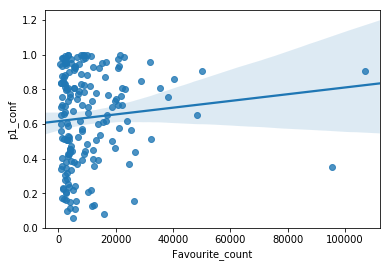

In [124]:
sb.regplot(data = master_df, x = "Favourite_count", y = "p1_conf")

the coreelation between p1_conf and favourite

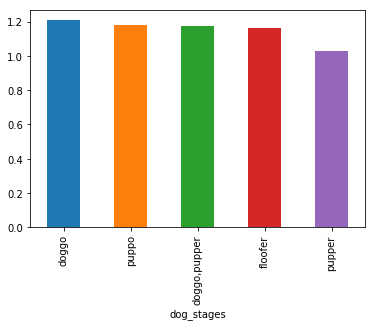

In [125]:
master_df.groupby("dog_stages")["rating"].mean().sort_values(ascending = False).plot(kind = "bar");

The dog stages when matched against the ratings

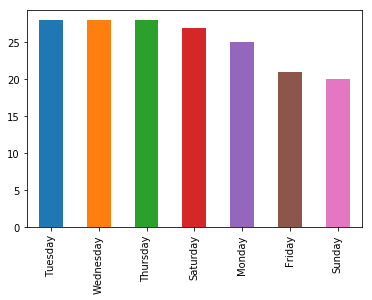

In [126]:
master_df.timestamp.value_counts().sort_values(ascending = False).plot(kind = "bar");

The day of the week with the highest tweet count

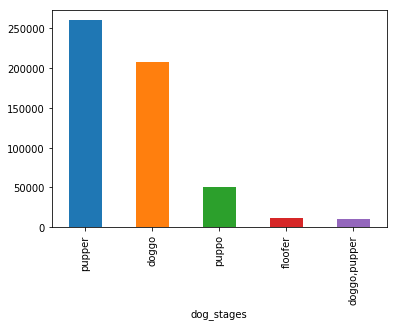

In [127]:
master_df.groupby("dog_stages")["retweet_count"].sum().sort_values(ascending = False).plot(kind = "bar")

The retweet_count per dog_stages

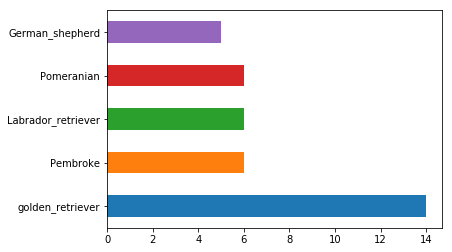

In [128]:
master_df["p1"].value_counts()[:5].plot(kind = "barh") 

The top 5 dog breeds